**Project**

#Get data from EasyOCR#

Read pdf to image

https://stackoverflow.com/questions/46184239/extract-a-page-from-a-pdf-as-a-jpeg

In [1]:
# Install library
!pip install pdf2image

In [ ]:
# Get image from pdf
from pdf2image import convert_from_path
pages = convert_from_path('pdf_file', 500)

ModuleNotFoundError: ignored

In [ ]:
# Save image
for page in pages:
    page.save('out.jpg', 'JPEG')

Convert image to pdf

https://stackoverflow.com/questions/27327513/create-pdf-from-a-list-of-images 

In [ ]:
from fpdf import FPDF
from PIL import Image
def makePdf(pdfFileName, listPages, dir = ''):
    if (dir):
        dir += "/"

    cover = Image.open(dir + str(listPages[0]) + ".jpg")
    width, height = cover.size

    pdf = FPDF(unit = "pt", format = [width, height])

    for page in listPages:
        pdf.add_page()
        pdf.image(dir + str(page) + ".jpg", 0, 0)

    pdf.output(dir + pdfFileName + ".pdf", "F")

OCR task

https://www.jaided.ai/easyocr/documentation

https://github.com/JaidedAI/EasyOCR

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install easyocr --no-deps

     |████████████████████████████████| 48.4MB 64kB/s 


In [4]:
pip install python-bidi

In [6]:
import easyocr
reader = easyocr.Reader(['en']) # need to run only once to load model into memory

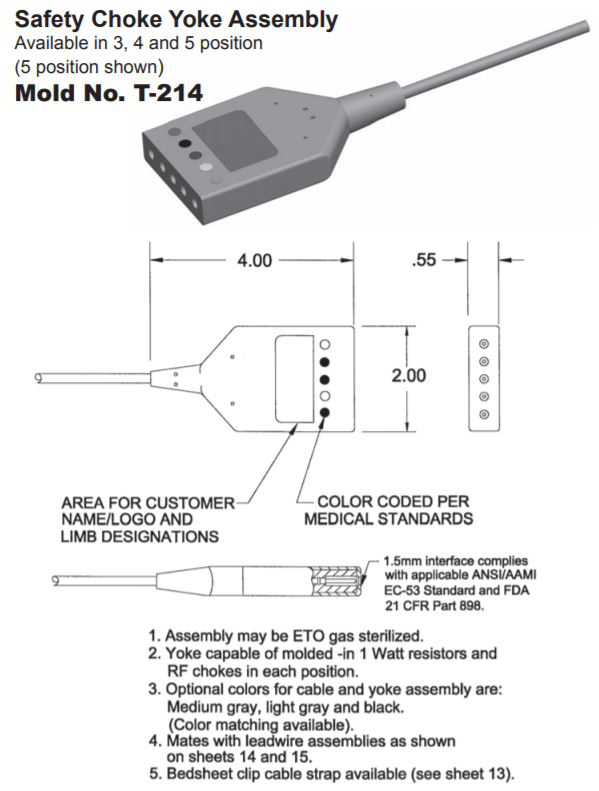

In [11]:
from openpyxl import load_workbook
import PIL
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
im = PIL.Image.open("/content/drive/My Drive/Test/Cable.JPG")
im

In [12]:
bounds = reader.readtext('/content/drive/My Drive/Test/Cable.JPG',paragraph=False, width_ths = 12, ycenter_ths= 1.2, add_margin= .1, text_threshold=.2, height_ths=.3 )
bounds
# width_ths (float, default = 0.5) - Maximum horizontal distance to merge boxes. ocr_parameter
# ycenter_ths (float, default = 0.5) - Maximum shift in y direction. Boxes with different level should not be merged.
# height_ths (float, default = 0.5) - Maximum different in box height. Boxes with very different text size should not be merged.
# text_threshold (float, default = 0.7) - Text confidence threshold
# add_margin (float, default = 0.1) - Extend bounding boxes in all direction by certain value. This is important for language with complex script (E.g. Thai).

[([[8, 1], [342, 1], [342, 58], [8, 58]],
  'Safetye ihihoken( okes floisembly',
  0.0008073963690549135),
 ([[10, 54], [168, 54], [168, 80], [10, 80]],
  '(5 position shown)',
  0.44326522946357727),
 ([[14, 80], [206, 80], [206, 106], [14, 106]],
  'Mold No. T-214',
  0.3691251873970032),
 ([[235, 249], [439, 249], [439, 269], [235, 269]],
  '4.00.55',
  0.5618467330932617),
 ([[389, 365], [429, 365], [429, 385], [389, 385]], '2.00', 0.861493706703186),
 ([[57, 489], [479, 489], [479, 531], [57, 531]],
  'NRMEOGSMSJOMERMEOICAR SPQEDARDS',
  0.00010636872320901603),
 ([[57, 524], [221, 524], [221, 545], [57, 545]],
  'LIMB DESIGNATIONS',
  0.43605196475982666),
 ([[392, 554], [540, 554], [540, 584], [392, 584]],
  'im appicable AQSTPAMI',
  1.4672748875455e-05),
 ([[408, 566], [471, 566], [471, 586], [408, 586]],
  'applicable',
  0.5490636229515076),
 ([[383, 569], [411, 569], [411, 583], [383, 583]],
  'wiih',
  0.23731227219104767),
 ([[381, 581], [535, 581], [535, 617], [381, 617]

In [14]:
wb.close()

In [16]:
wb = load_workbook('/content/drive/My Drive/Test/Report.xlsx')
sheet = wb['Attribute Data']


[342, 1] <class 'list'>
0 <class 'int'>
[168, 54] <class 'list'>
1 <class 'int'>
[206, 80] <class 'list'>
2 <class 'int'>
[439, 249] <class 'list'>
3 <class 'int'>
[429, 365] <class 'list'>
4 <class 'int'>
[479, 489] <class 'list'>
5 <class 'int'>
[221, 524] <class 'list'>
6 <class 'int'>
[540, 554] <class 'list'>
7 <class 'int'>
[471, 566] <class 'list'>
8 <class 'int'>
[411, 569] <class 'list'>
9 <class 'int'>
[535, 581] <class 'list'>
10 <class 'int'>
[501, 623] <class 'list'>
11 <class 'int'>
[507, 659] <class 'list'>
12 <class 'int'>
[409, 695] <class 'list'>
13 <class 'int'>
[463, 709] <class 'list'>
14 <class 'int'>
[288.6924656801795, 747.9343734606277] <class 'list'>
15 <class 'int'>
[516, 762] <class 'list'>
15 <class 'int'>


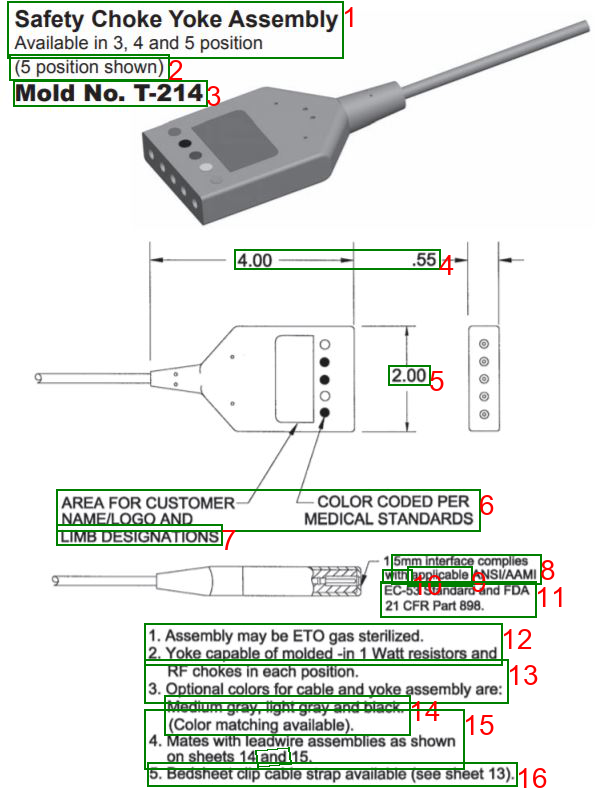

In [17]:
import re
def draw_boxes(image, bounds, color='green', width=2):
    draw = ImageDraw.Draw(image)
    i = 0
    ro = 7
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        print(p1,type(p1))
        print(i,type(i))
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
        if len(bound[1]) > 3 and bound[1] != 'NOTES (UNLESS OTHERWISE SPECIFIED)' :
          i +=1
          ro += 1
          temp = re.sub(r"^\d(.|,)", "", bound[1])
          fo = ImageFont.truetype(r'/content/drive/My Drive/Test/arial.ttf', 28, encoding="unic")
          # draw.text((x, y),"Sample Text",(r,g,b))
          draw.text(xy= (p1 ),text= str(i),fill='red',spacing= 50, font = fo,align='right')
          sheet.cell(row=ro, column=2).value = temp
    wb.save(filename='/content/drive/My Drive/Test/complete.xlsx')
    wb.close()
    return image

draw_boxes(im, bounds)

#Access Webcam

In [ ]:
import base64
import html
import io
import time
from IPython.display import display, Javascript
from google.colab.output import eval_js
import numpy as np
from PIL import Image
def start_input():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    var pendingResolve = null;
    var shutdown = false;
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 512, 512);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    async function createDom() {
      if (div !== null) {
        return stream;
      }
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);
      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 512; //video.videoWidth;
      captureCanvas.height = 512; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      return stream;
    }
    async function takePhoto(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }
      var preCreate = Date.now();
      stream = await createDom();
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')
  display(js)
def take_photo(label, img_data):
  data = eval_js('takePhoto("{}", "{}")'.format(label, img_data))
  return data

In [ ]:
start_input()
label_html = 'Capturing...'
img_data = ''
count = 0 
while True:
    js_reply = take_photo(label_html, img_data)   
    if not js_reply:
        break

<IPython.core.display.Javascript object>

#Dimension measurement#

**Source from PyImageresearch **
https://www.pyimagesearch.com/2016/03/28/measuring-size-of-objects-in-an-image-with-opencv/


Install library imutils

In [ ]:
pip install imutils

#Validation#

In [ ]:
!git clone https://github.com/luthfitabey/OpenCV-Measuring-Object.git

Cloning into 'OpenCV-Measuring-Object'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 71 (delta 38), reused 71 (delta 38), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [18]:
!git clone https://github.com/Practical-CV/Measuring-Size-of-Objects-with-OpenCV.git

Cloning into 'Measuring-Size-of-Objects-with-OpenCV'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 1), reused 11 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [ ]:
!python Measuring-Size-of-Objects-with-OpenCV/object_size.py --image images/example_01.png --width 0.955

In [22]:
!cp '/content/Measuring-Size-of-Objects-with-OpenCV/object_size.py' -d '/'

(415, 600, 3)
perform edge detection, then perform a dilation + erosion to close gaps in between object edges
find contours in the edge map
# loop over the contours individually


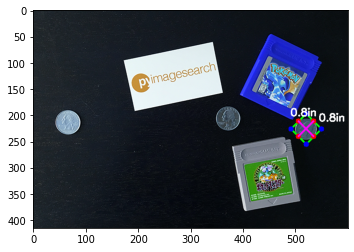

In [30]:
# USAGE
# python object_size.py --image images/example_01.png --width 0.955
# python object_size.py --image images/example_02.png --width 0.955
# python object_size.py --image images/example_03.png --width 3.5

# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)




def measure(img_path, width):


  # load the image, convert it to grayscale, and blur it slightly
  image = cv2.imread(img_path)
  print(image.shape)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray, (7, 7), 0)

  # perform edge detection, then perform a dilation + erosion to
  # close gaps in between object edges
  print('perform edge detection, then perform a dilation + erosion to close gaps in between object edges')
  edged = cv2.Canny(gray, 50, 100)
  edged = cv2.dilate(edged, None, iterations=1)
  edged = cv2.erode(edged, None, iterations=1)

  # find contours in the edge map
  print('find contours in the edge map')
  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)

  # sort the contours from left-to-right and initialize the
  # 'pixels per metric' calibration variable
  (cnts, _) = contours.sort_contours(cnts)
  pixelsPerMetric = None

  # loop over the contours individually
  print('# loop over the contours individually')
  for c in cnts:
    # if the contour is not sufficiently large, ignore it
    if cv2.contourArea(c) < 100:
      continue
    # compute the rotated bounding box of the contour
    orig = image.copy()
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")

    # order the points in the contour such that they appear
    # in top-left, top-right, bottom-right, and bottom-left
    # order, then draw the outline of the rotated bounding
    # box
    box = perspective.order_points(box)
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

    # loop over the original points and draw them
    for (x, y) in box:
      cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)

    # unpack the ordered bounding box, then compute the midpoint
    # between the top-left and top-right coordinates, followed by
    # the midpoint between bottom-left and bottom-right coordinates
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)

    # compute the midpoint between the top-left and top-right points,
    # followed by the midpoint between the top-righ and bottom-right
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    # draw the midpoints on the image
    cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)

    # draw lines between the midpoints
    cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
      (255, 0, 255), 2)
    cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
      (255, 0, 255), 2)

    # compute the Euclidean distance between the midpoints
    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

    # if the pixels per metric has not been initialized, then
    # compute it as the ratio of pixels to supplied metric
    # (in this case, inches)
    if pixelsPerMetric is None:
      pixelsPerMetric = dB / width

    # compute the size of the object
    dimA = dA / pixelsPerMetric
    dimB = dB / pixelsPerMetric

    # draw the object sizes on the image
    cv2.putText(orig, "{:.1f}in".format(dimA),
      (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
      0.65, (255, 255, 255), 2)
    cv2.putText(orig, "{:.1f}in".format(dimB),
      (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
      0.65, (255, 255, 255), 2)

  return orig

img = measure('/content/drive/My Drive/Test/example_01.png', 0.955)
plt.imshow(img)
